In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

### DATA PROCESSING

In [2]:
!unzip '/content/drive/MyDrive/openCV/Vegetables.zip' -d extracted_files

Archive:  /content/drive/MyDrive/openCV/Vegetables.zip
replace extracted_files/Vegetable Images/test/Bean/0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


 'Papaya' and "Carrot' are selected for case study. Files are checked manualy and confirmed images are clean no unwanted images.

In [3]:
papaya_train='/content/extracted_files/Vegetable Images/train/Papaya'
carrot_train='/content/extracted_files/Vegetable Images/train/Carrot'

In [4]:
img=cv2.imread('/content/extracted_files/Vegetable Images/train/Papaya/0002.jpg')

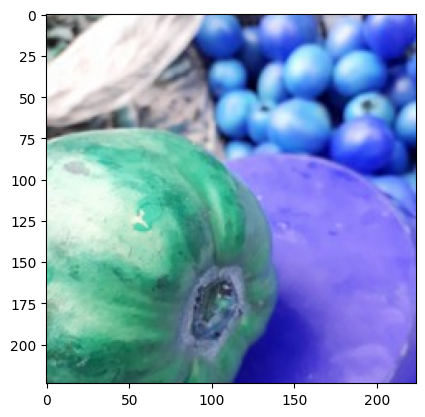

In [5]:
plt.imshow(img)

In [6]:
img.shape

(224, 224, 3)

### DATA TO np ARRAY

In [7]:
veg_dic={'Papaya':0,'Carrot':1}

In [8]:
file_name_dic={}
file_path=[]
for entry in os.scandir(papaya_train):
  file_path.append(entry.path)
file_name_dic["Papaya"]=file_path
file_path=[]
for entry in os.scandir(carrot_train):
  file_path.append(entry.path)
file_name_dic["Carrot"]=file_path
file_name_dic


{'Papaya': ['/content/extracted_files/Vegetable Images/train/Papaya/0858.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0812.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0815.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0348.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0464.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0324.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0066.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0786.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0205.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0726.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0194.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/1000.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0196.jpg',
  '/content/extracted_files/Vegetable Images/train/Papaya/0174.jpg',
  '/content/extracted_fi

**feature extraction and making of X,y set for training**

In [9]:
X,y_train=[],[]
for veg, images in file_name_dic.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (224, 224))  # Resize the image
        nor_img = resized_img / 255.0  # Normalize the resized image
        X.append(nor_img)
        y_train.append(veg_dic[veg])

In [10]:
import random

# Combine X and y_train into tuples
combined_data = list(zip(X, y_train))

# Shuffle the combined data
random.shuffle(combined_data)

# Unzip the shuffled data back into X and y_train
X_shuffled, y_train_shuffled = zip(*combined_data)

# Convert back to lists
X = list(X_shuffled)
y_train = list(y_train_shuffled)

In [11]:
y_train = np.array(y_train)

In [12]:
X[3]

array([[[0.13333333, 0.30980392, 0.71372549],
        [0.10588235, 0.28235294, 0.69411765],
        [0.07058824, 0.24313725, 0.6627451 ],
        ...,
        [0.03529412, 0.16078431, 0.69019608],
        [0.02745098, 0.15686275, 0.70588235],
        [0.02352941, 0.14901961, 0.70980392]],

       [[0.14117647, 0.31764706, 0.72156863],
        [0.12156863, 0.29803922, 0.70196078],
        [0.09019608, 0.2627451 , 0.68235294],
        ...,
        [0.01568627, 0.14117647, 0.67058824],
        [0.03137255, 0.15294118, 0.69803922],
        [0.03921569, 0.15686275, 0.70980392]],

       [[0.16078431, 0.33333333, 0.72941176],
        [0.15294118, 0.32156863, 0.7254902 ],
        [0.11764706, 0.28235294, 0.70196078],
        ...,
        [0.00784314, 0.12941176, 0.65098039],
        [0.03529412, 0.14901961, 0.69019608],
        [0.05882353, 0.17254902, 0.71764706]],

       ...,

       [[0.03529412, 0.04705882, 0.61568627],
        [0.03529412, 0.04705882, 0.61568627],
        [0.03529412, 0

In [13]:
X_stacked = np.stack(X)
X_reshaped = X_stacked.reshape(-1, 224, 224, 3)
X_train = X_reshaped.astype('float32')

In [14]:
X_train.shape

(2000, 224, 224, 3)

### TRAINING AND TESTING

In [15]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.8902 - loss: 0.4005
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 1.0000 - loss: 7.0921e-04
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 1.0000 - loss: 1.6219e-04
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 1.0000 - loss: 1.2499e-05
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 1.0000 - loss: 6.5158e-06
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 1.0000 - loss: 1.2721e-05
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 1.0000 - loss: 1.0103e-05
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 1.0000 - loss: 9.9241e-06
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 1.0000 - loss: 1.9531e-06
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 1.0000 - loss: 1.0094e-05


In [19]:
papaya_test='/content/extracted_files/Vegetable Images/test/Papaya'
carrot_test='/content/extracted_files/Vegetable Images/test/Carrot'

file_name_dic_test={}
file_path_test=[]
for entry in os.scandir(papaya_test):
  file_path_test.append(entry.path)
file_name_dic_test["Papaya"]=file_path_test
file_path_test=[]
for entry in os.scandir(carrot_test):
  file_path_test.append(entry.path)
file_name_dic_test["Carrot"]=file_path_test

X_test,y_test=[],[]
for veg, images in file_name_dic_test.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (224, 224))  # Resize the image
        nor_img = resized_img / 255.0  # Normalize the resized image
        X_test.append(nor_img)
        y_test.append(veg_dic[veg])

y_test = np.array(y_test)
X_stacked_test = np.stack(X_test)
X_reshaped_test = X_stacked_test.reshape(-1, 224, 224, 3)
X_test = X_reshaped_test.astype('float32')
X_test.shape

(400, 224, 224, 3)

In [20]:
cnn.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step - accuracy: 1.0000 - loss: 9.3296e-10


[3.5366858330831974e-09, 1.0]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 682ms/step


array([[4.9530310e-35],
       [0.0000000e+00],
       [2.9534570e-13],
       [2.0809224e-22],
       [0.0000000e+00]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

In [23]:
y_test[:5]

array([0, 0, 0, 0, 0])

### VALIDATION

In [25]:
 import random

folder1_path = '/content/extracted_files/Vegetable Images/validation/Papaya'
folder2_path = '/content/extracted_files/Vegetable Images/validation/Carrot'

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

images_folder1 = load_images_from_folder(folder1_path)
images_folder2 = load_images_from_folder(folder2_path)

# Combine the images from both folders into a single list
all_images = images_folder1 + images_folder2

random.shuffle(all_images)

In [30]:
# accessing a random image and processing
img_rand=all_images[15]

resized_image = cv2.resize(img_rand, (224, 224))
normalized_image = resized_image / 255.0

input_image = np.expand_dims(normalized_image, axis=0)

predictions = cnn.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [31]:
predicted_class = np.argmax(predictions)

In [32]:
if predicted_class==0:
  print("It is a Papaya")
else: print("It is a Carrot")

It is a Papaya


array([[[ 57,  72,  81],
        [ 64,  79,  88],
        [ 79,  95, 102],
        ...,
        [ 85, 191, 138],
        [ 90, 196, 143],
        [ 80, 186, 133]],

       [[ 62,  82,  87],
        [ 70,  90,  95],
        [ 85, 105, 110],
        ...,
        [ 83, 189, 136],
        [ 87, 193, 140],
        [ 80, 186, 133]],

       [[ 78, 109, 106],
        [ 87, 119, 114],
        [105, 137, 132],
        ...,
        [ 81, 188, 132],
        [ 82, 189, 133],
        [ 79, 186, 130]],

       ...,

       [[ 63,  85,  83],
        [ 63,  85,  83],
        [ 63,  84,  81],
        ...,
        [ 11, 151,  92],
        [ 11, 153,  94],
        [ 14, 156,  97]],

       [[ 58,  80,  78],
        [ 59,  81,  79],
        [ 62,  83,  80],
        ...,
        [ 11, 154,  92],
        [ 12, 155,  93],
        [ 12, 155,  93]],

       [[ 65,  87,  85],
        [ 64,  86,  84],
        [ 65,  86,  83],
        ...,
        [ 15, 158,  96],
        [ 14, 157,  95],
        [ 11, 154,  92]]], dtype=uint8)
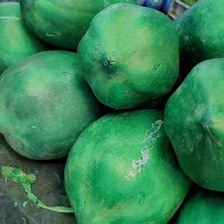

In [33]:
img_rand

### REAL-TIME VALIDATION

In [34]:
real_img=cv2.imread('/content/pa290347.jpg')

In [35]:
resized_image = cv2.resize(real_img, (224, 224))
normalized_image = resized_image / 255.0

input_image = np.expand_dims(normalized_image, axis=0)

predictions = cnn.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [36]:
predicted_class = np.argmax(predictions)
if predicted_class==0:
  print("It is a Papaya")
else: print("It is a Carrot")

It is a Papaya
